In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
source("sim_Y.r")

In [4]:
A<-read.csv('lat_long_2029.csv')

In [5]:
head(A)

,accession_id,name,country,latitude,longitude,count_phenotypes
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,1,ALL1-2,France,45.2667,1.48333,130
2,2,ALL1-3,France,45.2667,1.48333,115
3,4,ALL1-5,France,45.2667,1.48333,0
4,5,ALL1-6,France,45.2667,1.48333,8
5,6,ALL1-7,France,45.2667,1.48333,8
6,7,ALL1-8,France,45.2667,1.48333,6


In [6]:
load('X_Mix.rda')

In [7]:
dim(X)

[1]  2029 22000

In [8]:
X[1:10,1:10]

,1- 1283933,1- 4174493,1- 8236809,1- 4756186,1- 310460,1- 8017074,1- 8201702,1- 1234138,1- 3647216,1- 3818108
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0


In [9]:
n=100
acc=A
sp_acc=0
no_acc=200
fix_acc=TRUE
SNPs=X
no_snps=1
ve=.1
mac=5
h2=0.7
seed=42
bk=1000

### Wähle 200 zufällige Accessions und filtere nach MAC

In [10]:
a<-sample(acc$accession_id,no_acc)
X_<-SNPs[rownames(SNPs)%in%a,]
af<-apply(X_,2,sum)
X_ok<-X_[,which(af>mac&af<(no_acc-mac))]

### Wähle zufälligen kausalen SNP

In [11]:
u<-1
# set the seed 
set.seed(seed+u)
caus<-X_ok[,sample(1:ncol(X_ok),(no_snps+1))] # the +1 here is to make sure that caus is still a matrix (not a vector)

### Wähle 1000 SNPs als Hintergrundsignal mit kleinen zufälligen (normalverteilten) Effekten

In [12]:
#generating polygenic background
X3<-X_ok[,!colnames(X_ok)%in%colnames(caus)]

back<-X3[,sample(1:ncol(X3),bk)]

betas<-rnorm(bk,mean=0,sd=0.1)
first<- back %*% betas

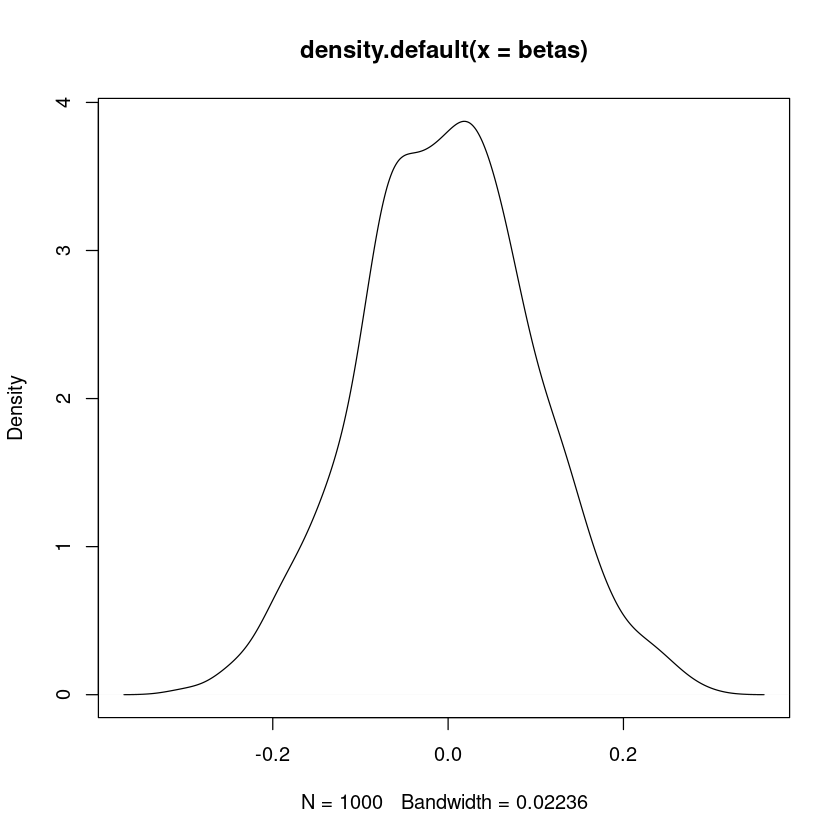

In [13]:
plot(density(betas))

In [14]:
range(betas)

[1] -0.3025963  0.2932248

### Füge einen zufälligen normalverteilten Wert hinzu um auf eine Heritability von 0.7 zu kommen

In [15]:
### adding genetic background to data
sim<-data.frame(ecot_id=as.integer(rownames(back)),value=first)

### set heritability 
dat<-var(sim[,2])

h_2<-dat/h2-dat
fix1<-rnorm(nrow(back),0,sqrt(h_2))
sim_<-data.frame(ecot_id=as.integer(rownames(back)),value=first+fix1)

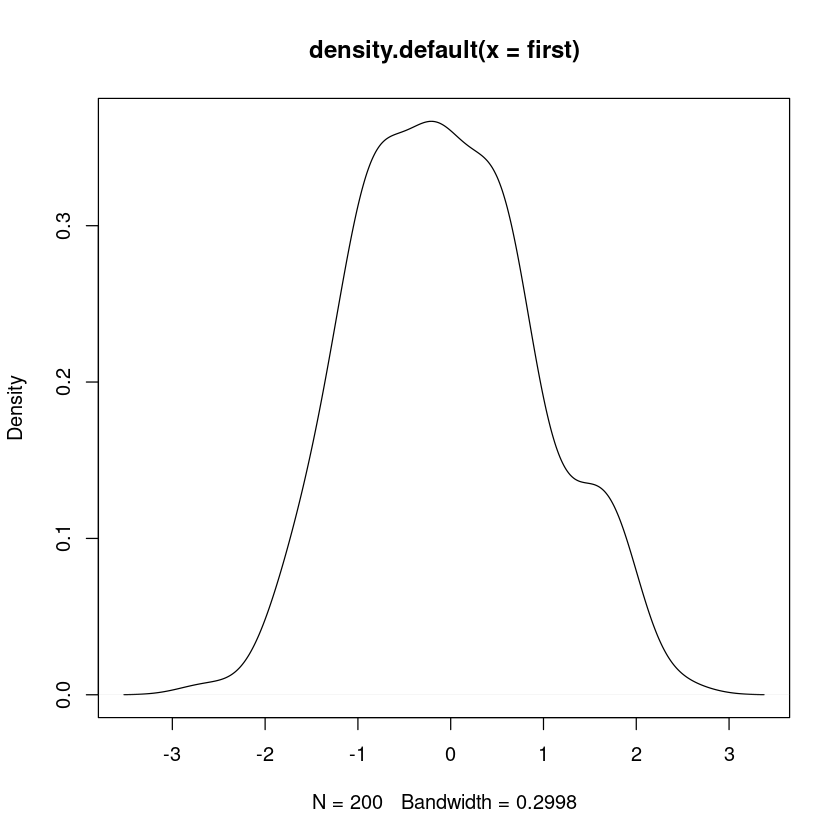

In [16]:
plot(density(first))

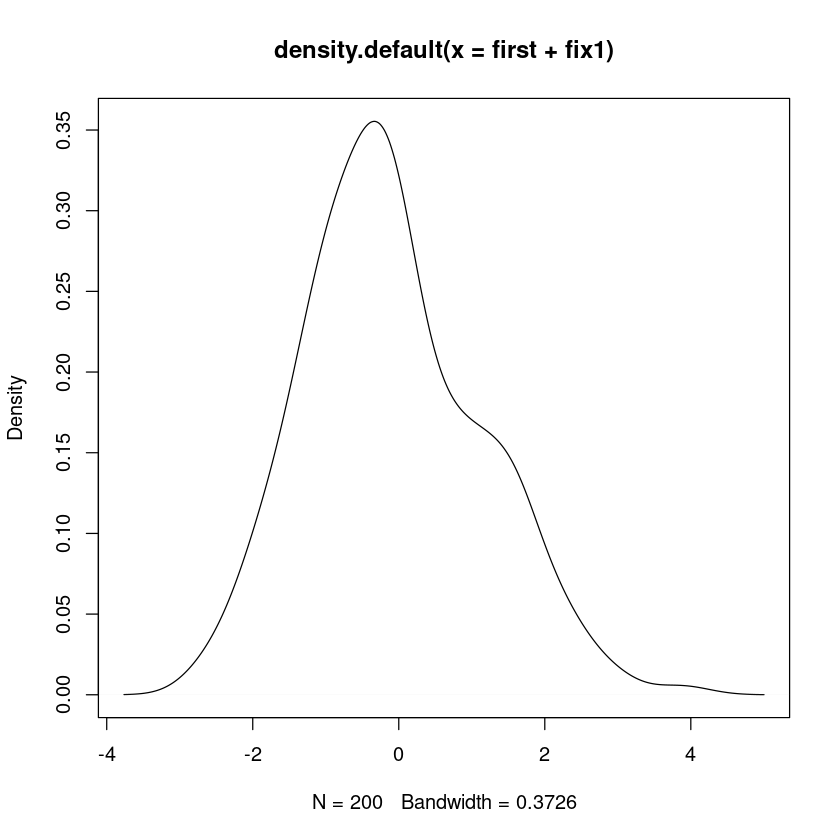

In [17]:
plot(density(first+fix1))

### Füge den Effekt des kausalen Markers hinzu, so dass er 10% der Varianz erklärt

In [18]:
for (t in 1:length(ve)) {
    beta<-sqrt((ve[t]/(1-ve[t]))*(var(sim_[,2])/var(caus[,t])))
    cand<-beta*caus[,t]
    sim_$value<-sim_$value+cand
}

In [19]:
beta

[1] 1.097374

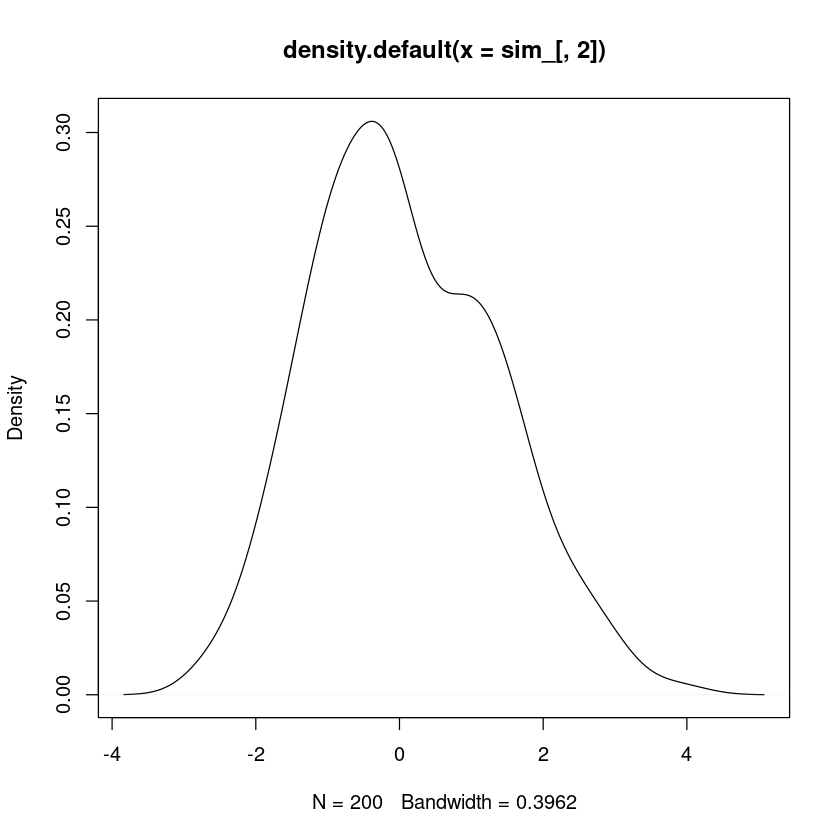

In [20]:
plot(density(sim_[,2]))

In [21]:
sim_

,ecot_id,value
,<int>,<dbl>
66,66,1.60720555
123,123,-0.92645609
188,188,2.84401657
194,194,-1.29173350
229,229,0.98135720
236,236,1.50003133
244,244,1.63530996
311,311,0.22627131
327,327,-0.19233286


In [22]:
library(moments)

In [23]:
print(skewness(rnorm(100000)))
print(kurtosis(rnorm(100000)))

[1] -0.003321989
[1] 2.987726


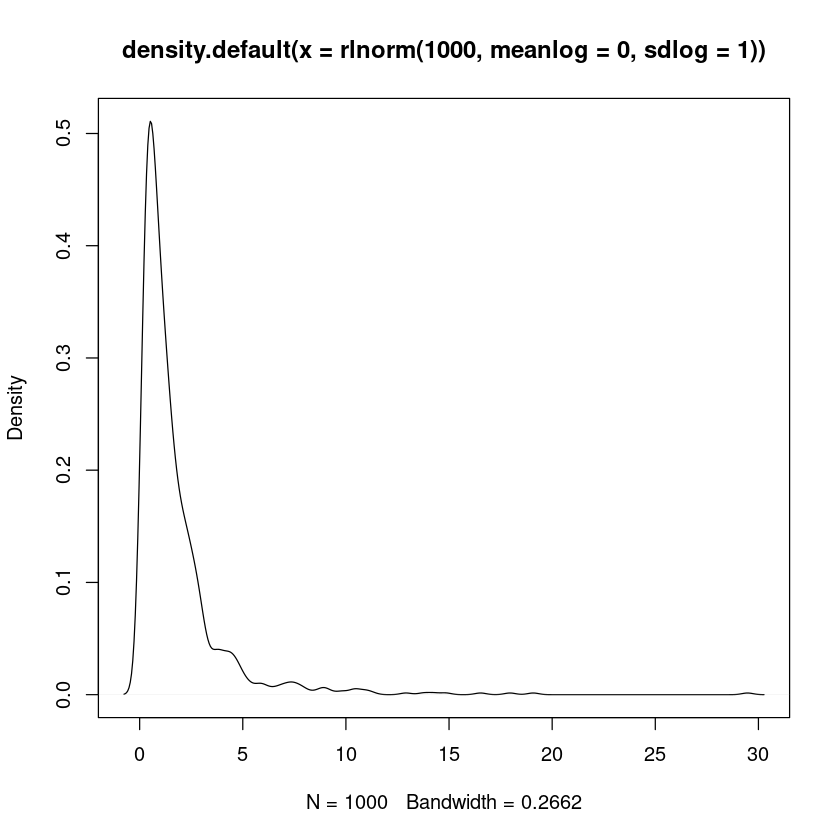

In [24]:
plot(density(rlnorm(1000, meanlog = 0, sdlog = 1)))

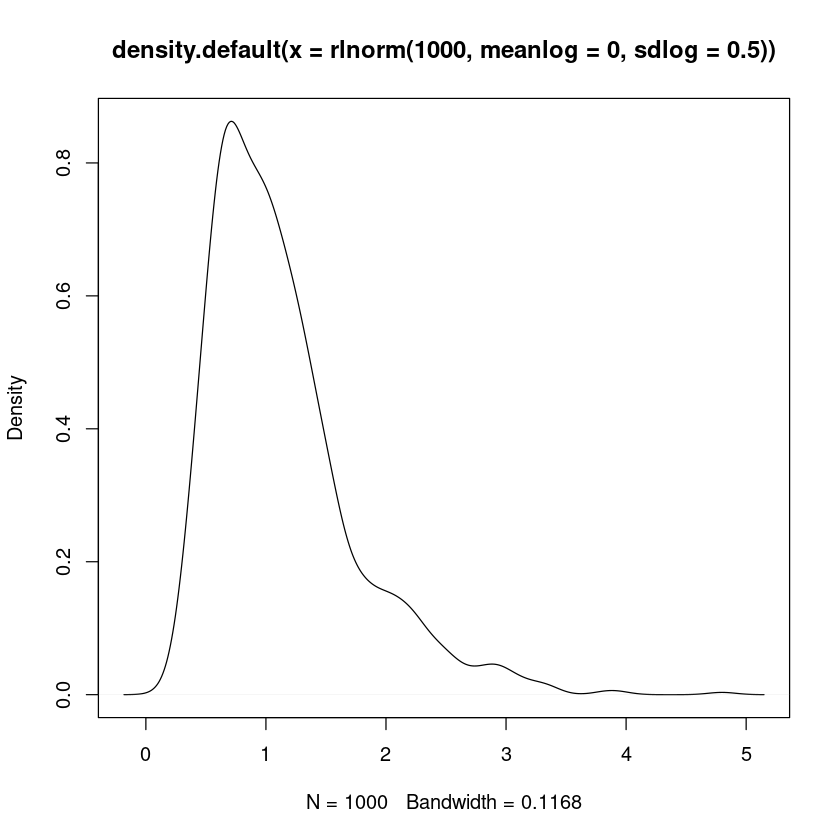

In [25]:
plot(density(rlnorm(1000, meanlog = 0, sdlog = .5)))

In [26]:
skewness(rlnorm(1000, meanlog = 0, sdlog = 6))

[1] 20.50836

In [27]:
library(PearsonDS)

In [28]:
empMoments(rnorm(1000))

mean    variance    skewness    kurtosis 
-0.04109065  0.99481357 -0.00145775  2.75606598

In [29]:
moments <- c(mean=0,variance=1,skewness=4,kurtosis=20)

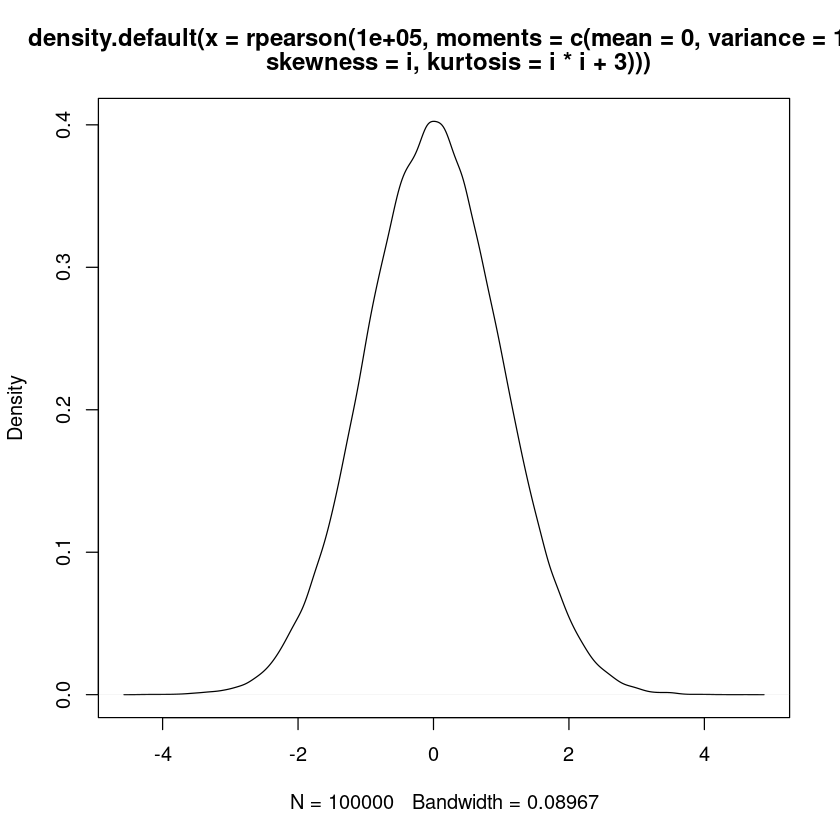

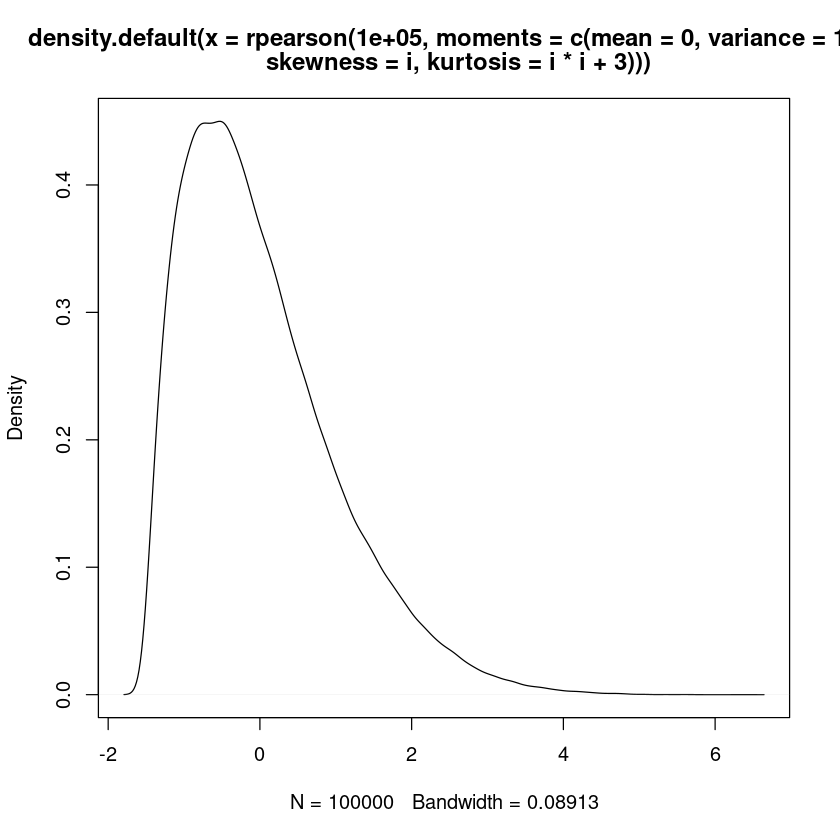

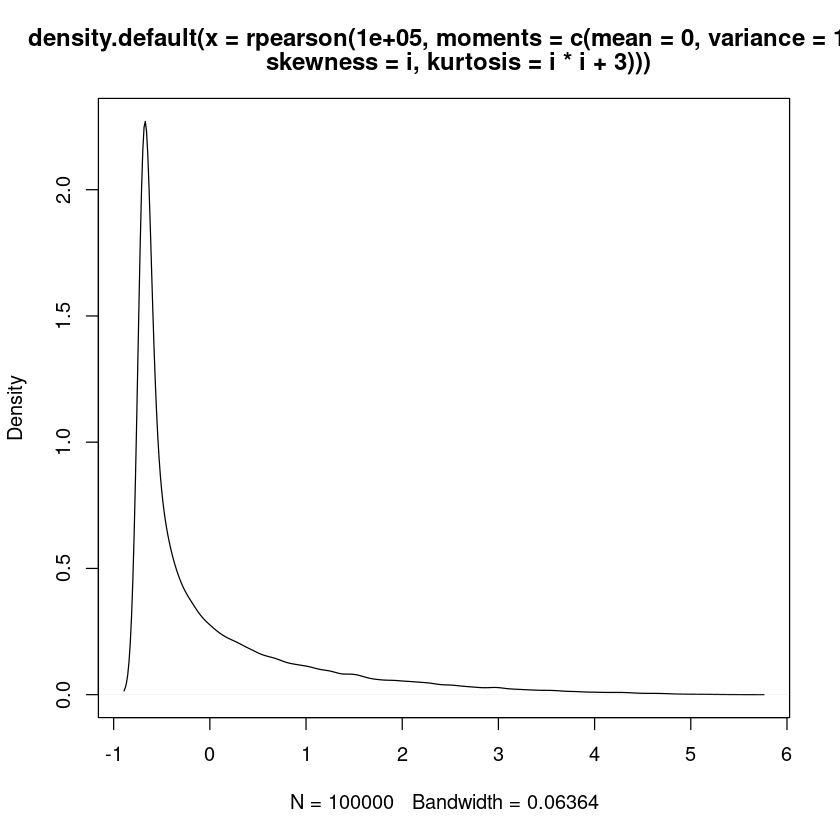

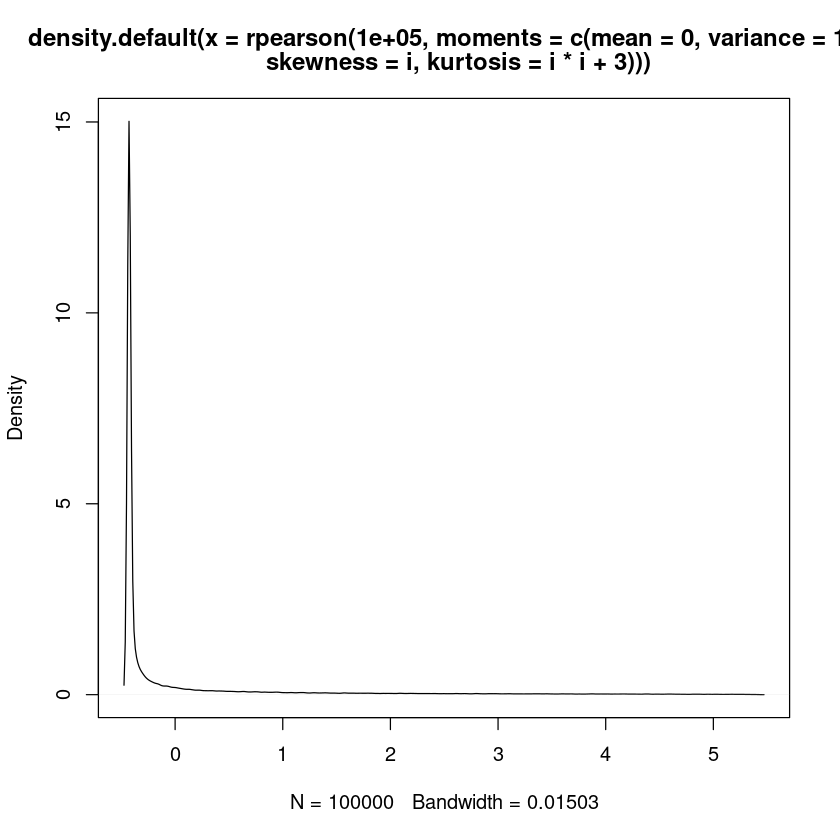

In [30]:
for(i in 0:3){
    plot(density(rpearson(100000, moments=c(mean=0,variance=1,skewness=i,kurtosis=i*i+3))))
}

In [31]:
sim_data <- map_dfr(seq(0,2,.25), function(x){tibble(data=rpearson(100000, moments=c(mean=0,variance=1,skewness=x,kurtosis=x*x+3)),skewness=x,kurtosis=x*x+3)})

In [32]:
theme_set(theme_light())

In [33]:
options(repr.plot.res=150)

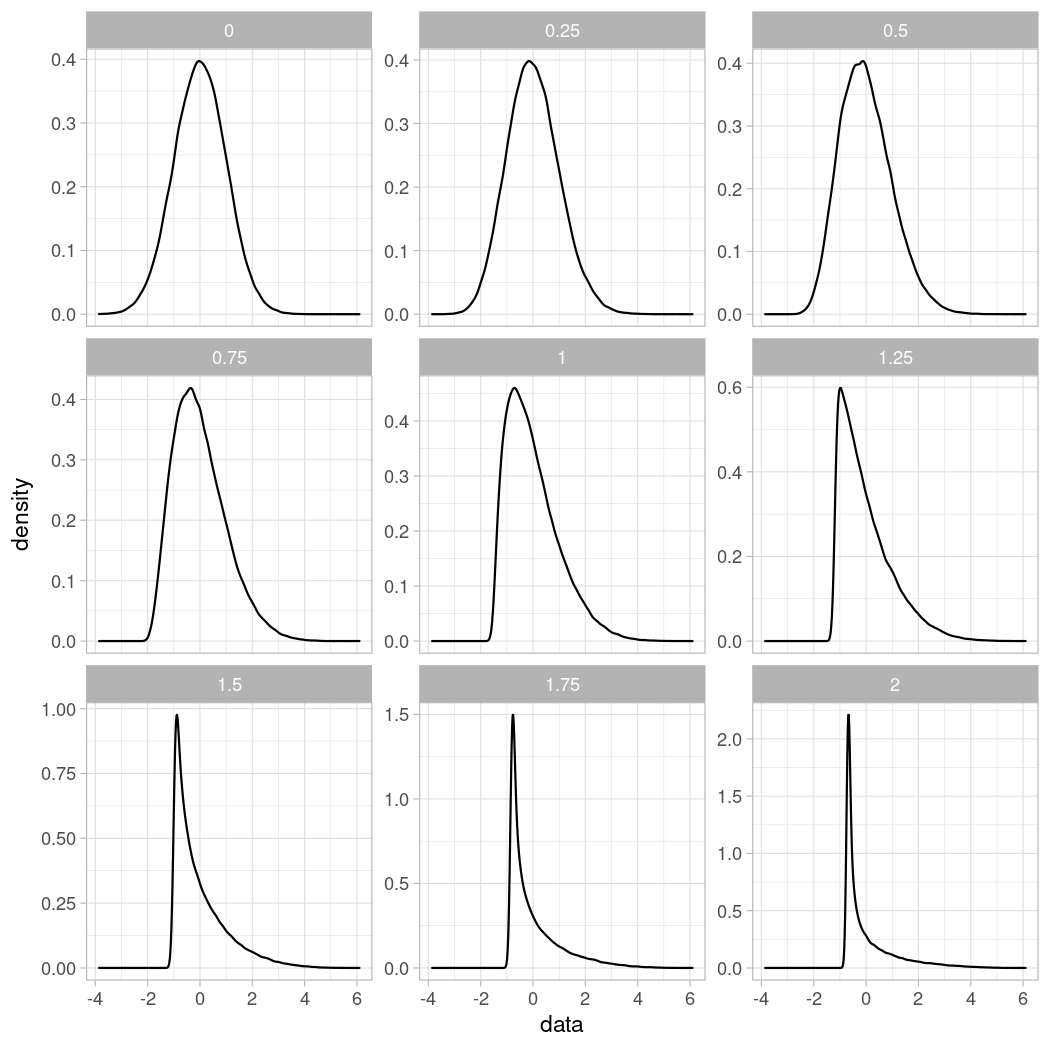

In [34]:
ggplot(sim_data, aes(x=data)) + geom_density() + facet_wrap(~skewness,scales = "free_y")

In [35]:
source("sim_Y_skewed.r")

In [36]:
skewness(sim_Y_skewed(skew=3,kurt=12,seed=2)$value)

In [37]:
result <- sim_Y_skewed(skew=2,kurt=7)

In [38]:
rt <- map_dfr(result$Y,tibble,.id="i")

In [39]:
rt %>% group_by(i) %>% mutate(value-mean(value))

i,ecot_id,value,value - mean(value)
<chr>,<int>,<dbl>,<dbl>
1,62,-1.4484107,-0.88680993
1,82,-1.5410754,-0.97947456
1,83,0.2163526,0.77795339
1,94,-2.4970567,-1.93545586
1,122,0.3786988,0.94029959
1,123,-1.3212398,-0.75963896
1,126,-2.3121643,-1.75056348
1,153,-2.6403689,-2.07876808
1,169,-2.1254525,-1.56385165


In [40]:
# mean centered distribution

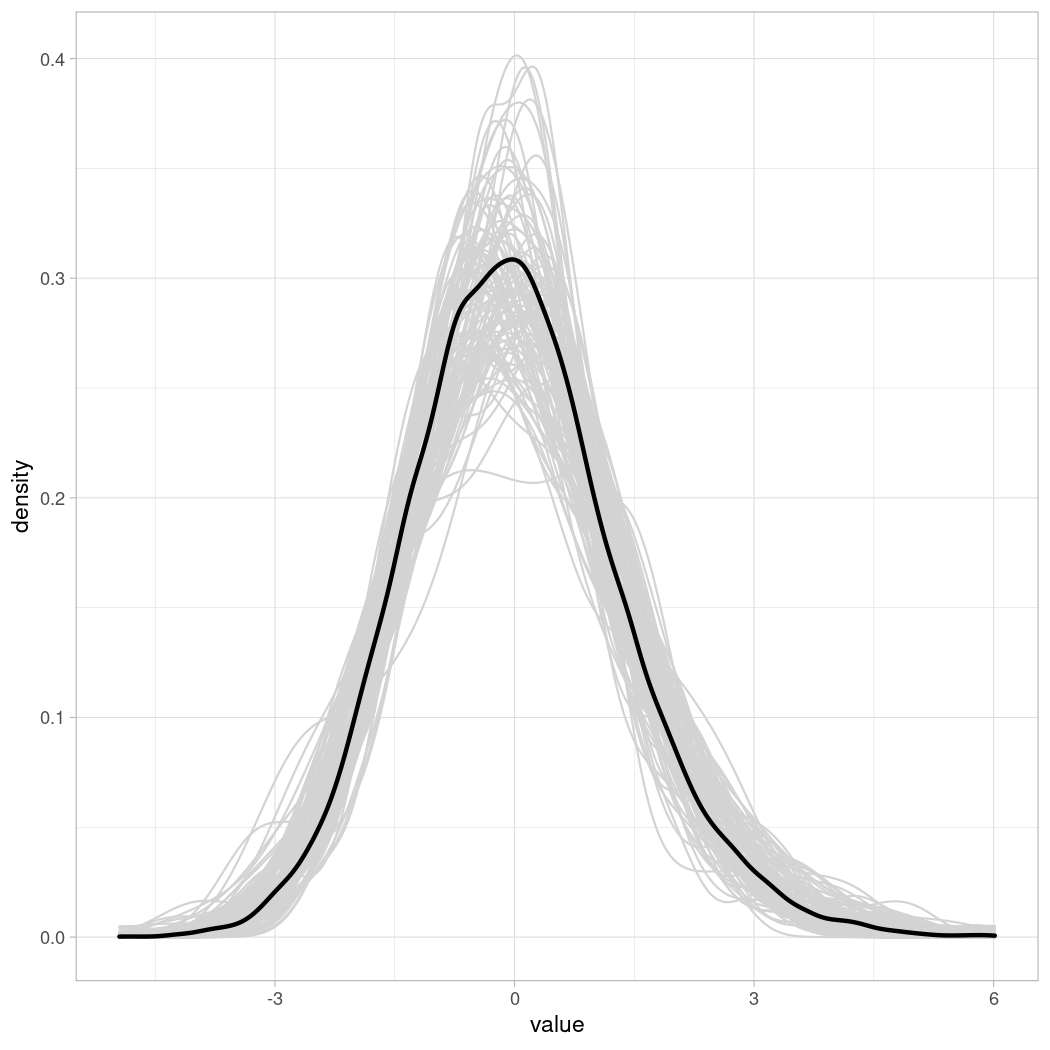

In [41]:
rt %>% group_by(i) %>% mutate(value=value-mean(value)) %>% ggplot(aes(value)) + geom_density(aes(group=i),color="lightgrey") + geom_density(lwd=1) + theme(legend.position = "none")

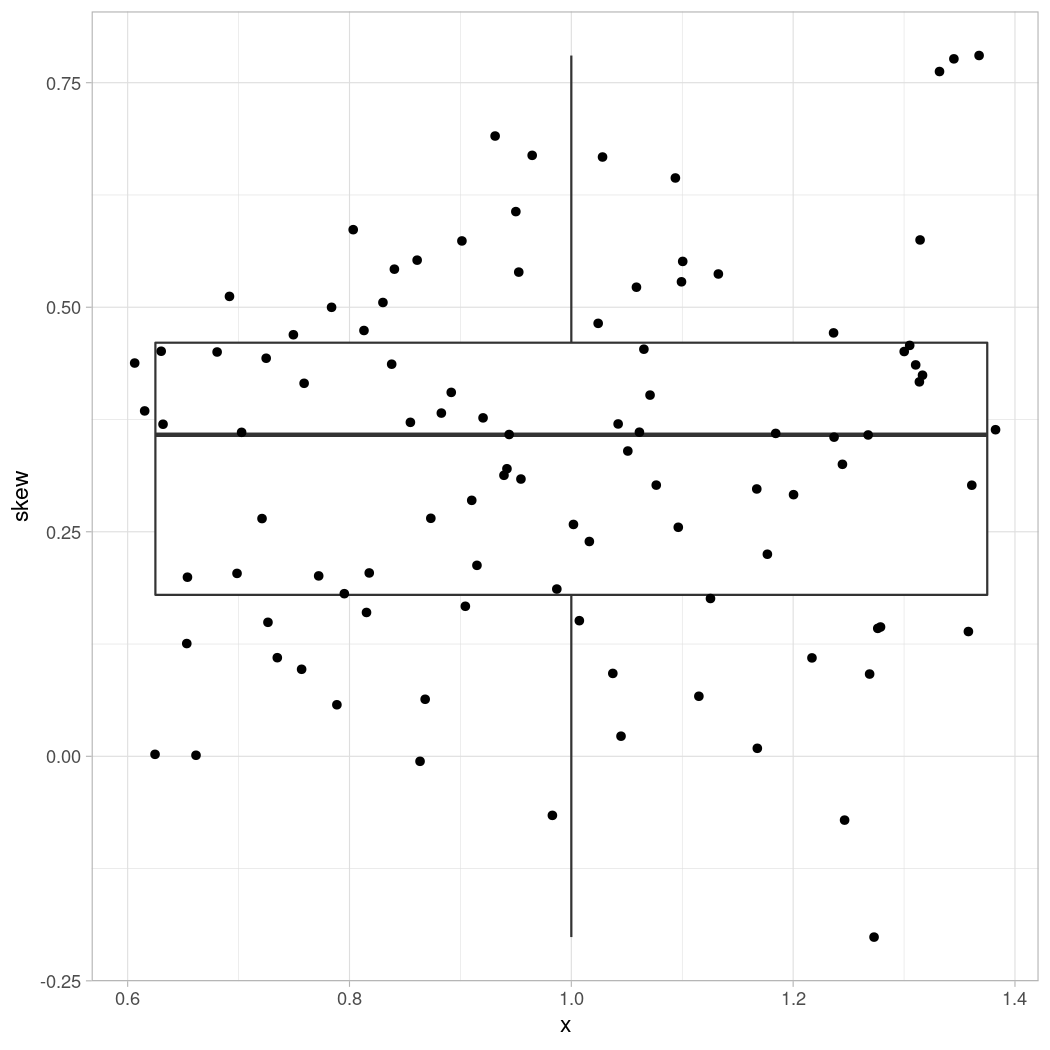

In [42]:
rt %>% group_by(i) %>% summarize(skew=skewness(value)) %>% ggplot(aes(x=1,y=skew)) + geom_boxplot() + geom_jitter()

In [43]:
get_skewed_df <- function(skew){
    result <- sim_Y_skewed(skew=skew,kurt=skew*skew+3)
    return(map_dfr(result$Y,tibble,.id="i") %>% mutate(in_skew=skew))
}

In [44]:
skewed_results <- map_dfr(seq(0,2,.25),get_skewed_df)

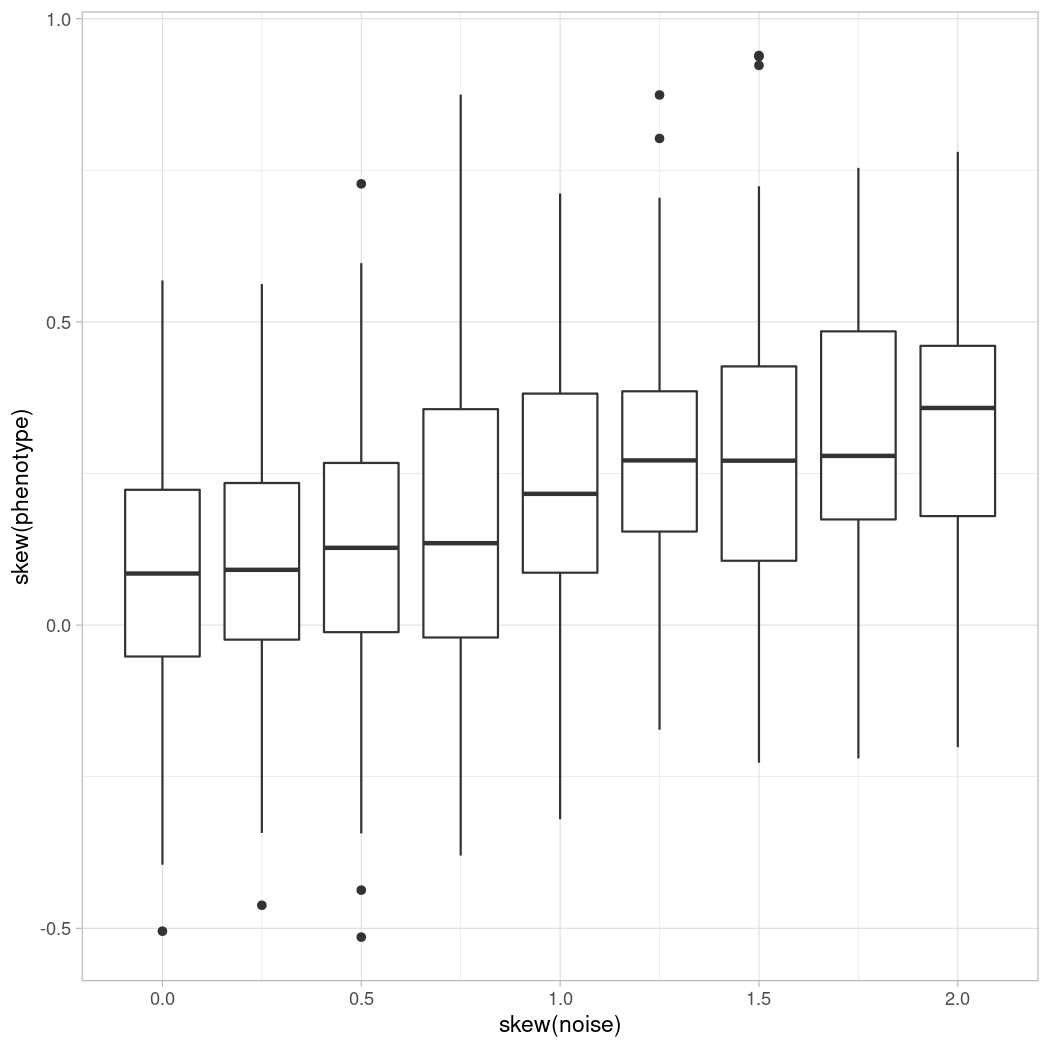

In [45]:
skewed_results %>%
    group_by(in_skew,i) %>%
    summarize(skew=skewness(value),.groups = "drop") %>%
    ggplot(aes(x=in_skew, y=skew, group=in_skew)) + geom_boxplot() + xlab("skew(noise)") + ylab("skew(phenotype)")

### Try with lower heritability (30%)

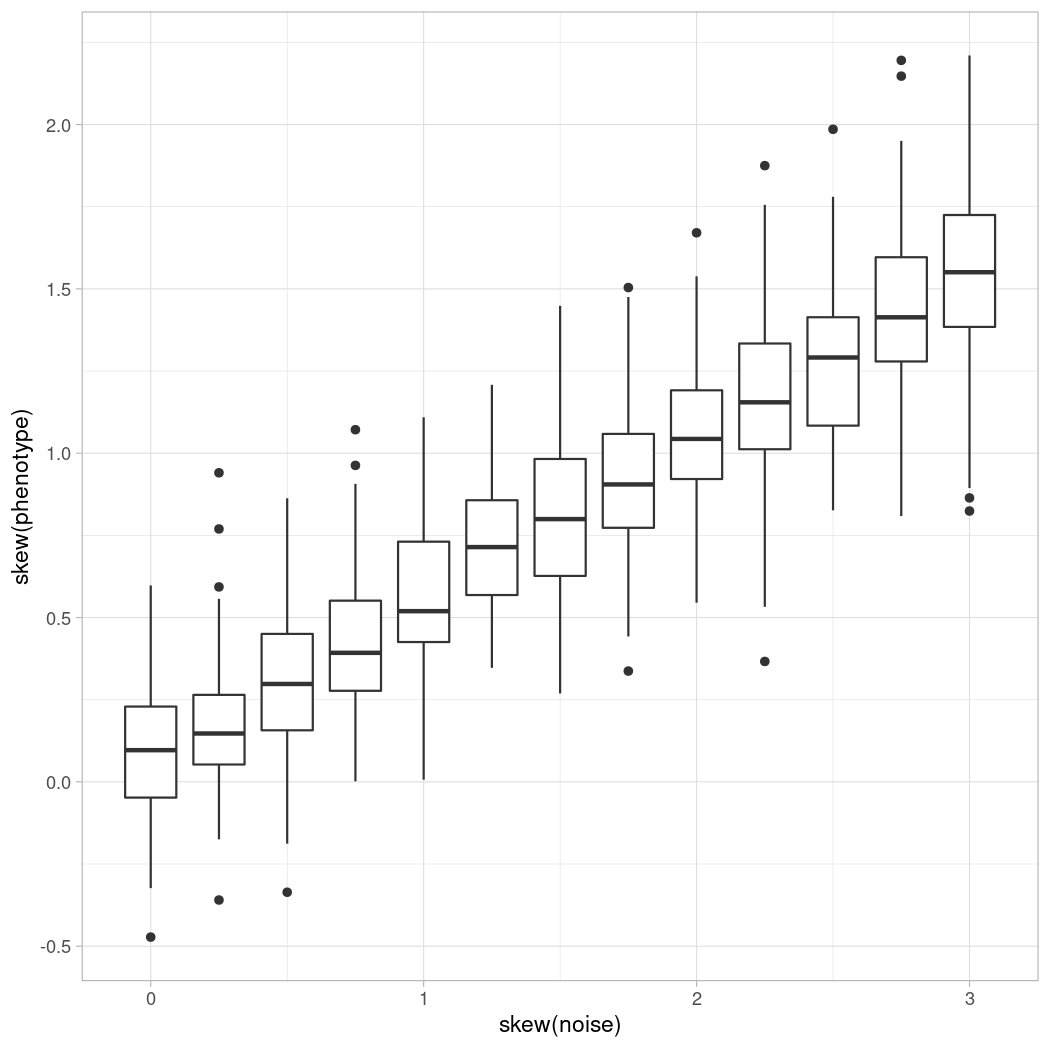

In [46]:
get_skewed_df <- function(skew){
    result <- sim_Y_skewed(h2=.3,skew=skew,kurt=skew*skew+3)
    return(map_dfr(result$Y,tibble,.id="i") %>% mutate(in_skew=skew))
}

skewed_results <- map_dfr(seq(0,3,.25),get_skewed_df)

skewed_results %>%
    group_by(in_skew,i) %>%
    summarize(skew=skewness(value),.groups = "drop") %>%
    ggplot(aes(x=in_skew, y=skew, group=in_skew)) + geom_boxplot() + xlab("skew(noise)") + ylab("skew(phenotype)")

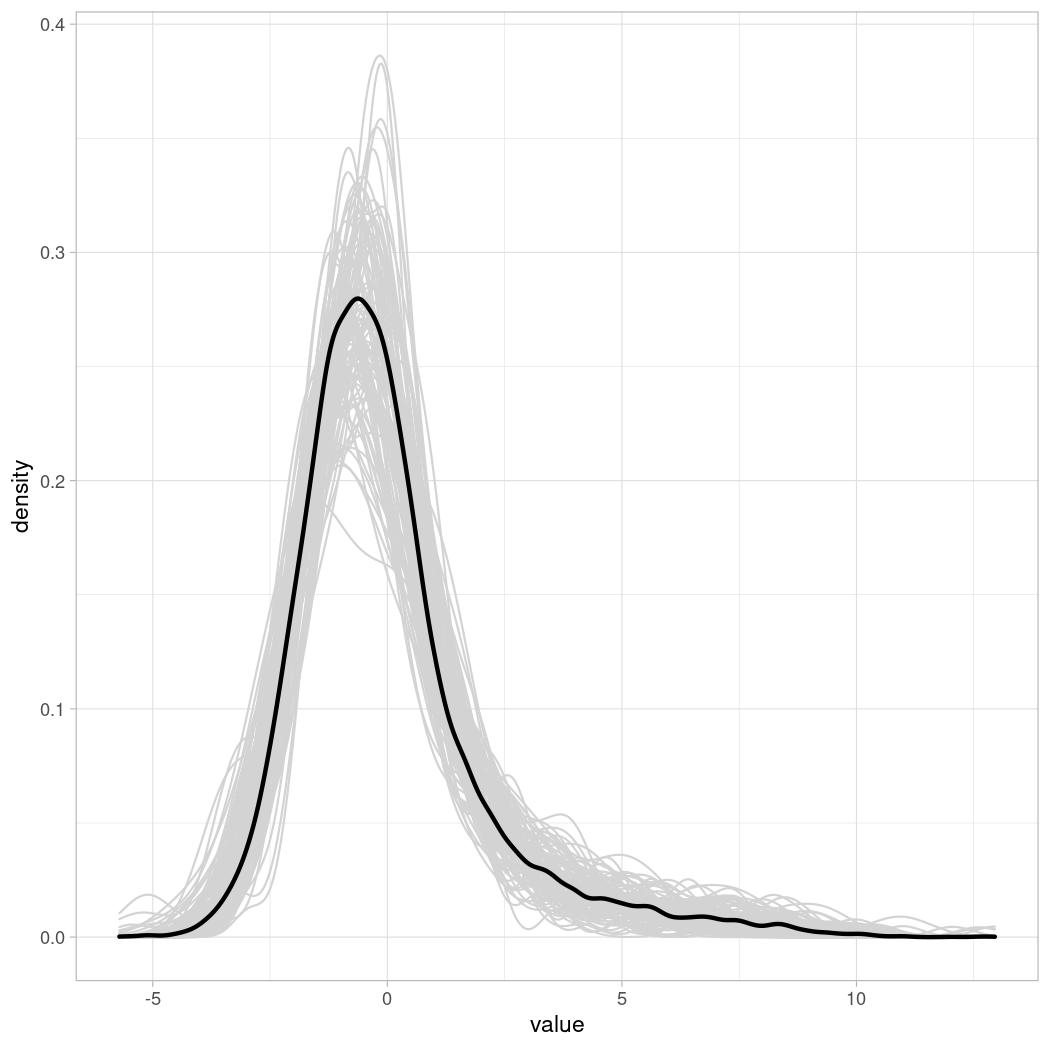

In [47]:
skewed_results %>% filter(in_skew==3) %>% group_by(i) %>% mutate(value=value-mean(value)) %>% ggplot(aes(value)) + geom_density(aes(group=i),color="lightgrey") + geom_density(lwd=1) + theme(legend.position = "none")

### Try with herit 70% and ve 70%

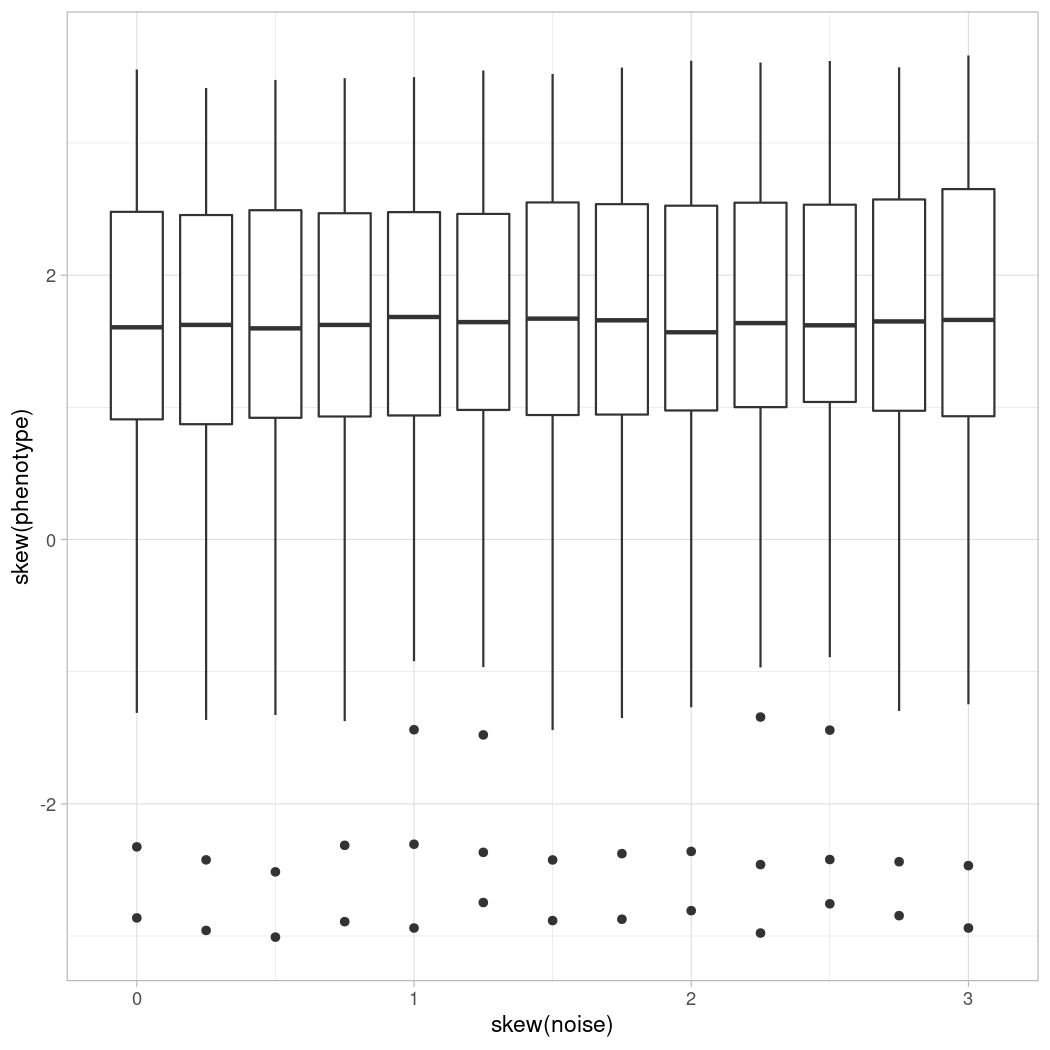

In [48]:
get_skewed_df <- function(skew){
    result <- sim_Y_skewed(h2=.7,ve=.7, skew=skew,kurt=skew*skew+3)
    return(map_dfr(result$Y,tibble,.id="i") %>% mutate(in_skew=skew))
}

skewed_results <- map_dfr(seq(0,3,.25),get_skewed_df)

skewed_results %>%
    group_by(in_skew,i) %>%
    summarize(skew=skewness(value),.groups = "drop") %>%
    ggplot(aes(x=in_skew, y=skew, group=in_skew)) + geom_boxplot() + xlab("skew(noise)") + ylab("skew(phenotype)")

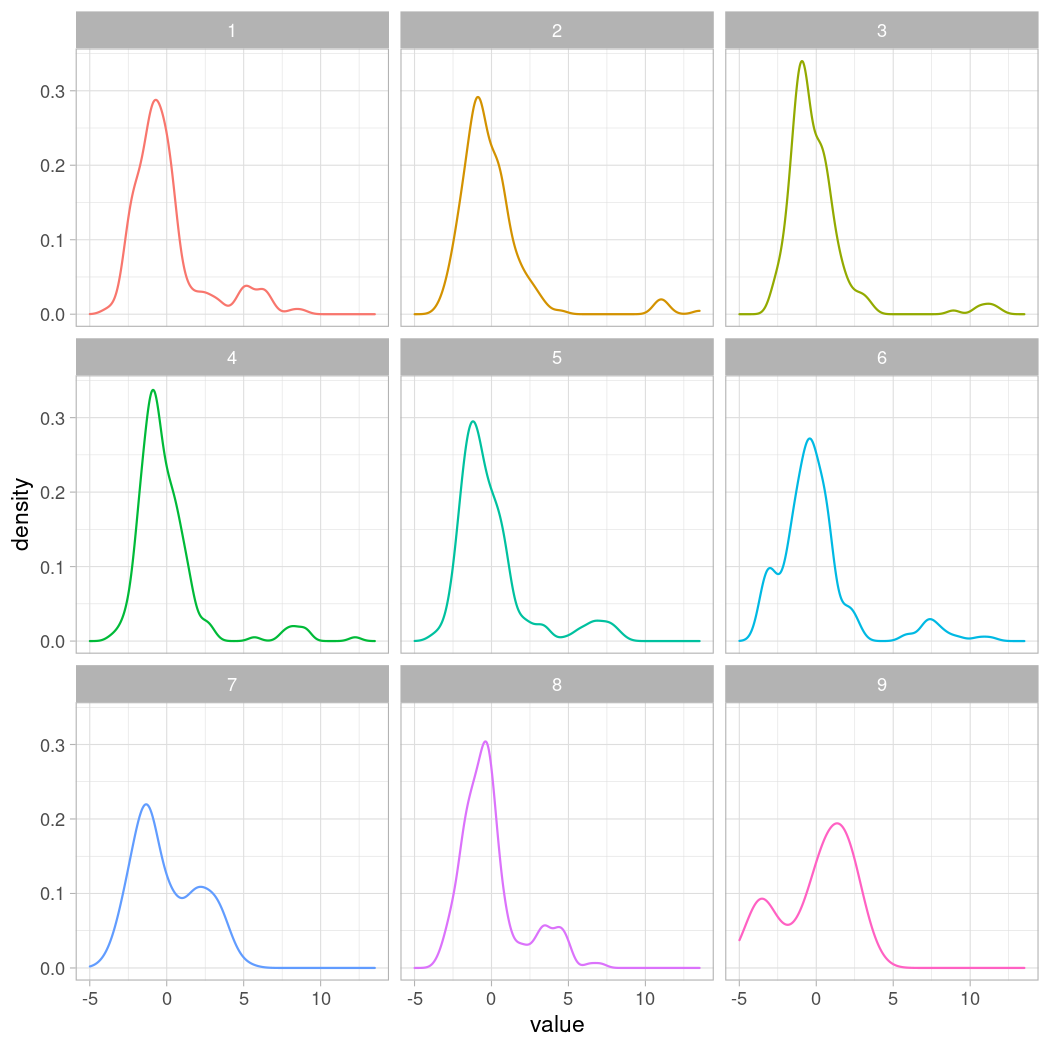

In [49]:
skewed_results %>% filter(in_skew==3,as.numeric(i)<10) %>% group_by(i) %>% mutate(value=value-mean(value)) %>% ggplot(aes(value)) + geom_density(aes(group=i,color=i)) + facet_wrap(i~.) + theme(legend.position = "none")

Increasing the heritability generally leads to higher skewness, as well. However, the reason is that the causative marker shifts a fraction of the distribution by a fixed amount. So in general we have an overlay of two identical distributions with shifted means. The fraction that is shifted is selected by the causative marker and the amount it is shifted is determined by the desired "variance explained" and by how balanced the SNP is.

### Export csv Files

In [49]:
result <- sim_Y_skewed(skew=1, kurt=4)
tibble(caus=result$Caus) %>% mutate(i=row_number()) %>% select(i,caus) %>% write_tsv("skew1_caus.tsv")
for(i in 1:100){
    write_csv(result$Y[[i]] %>% rename(accession_id=ecot_id,phenotype_value=value),str_c("skew1/skew1_",i,".csv"))
}

In [75]:
for(skew in seq(0,3,.25)){
    outdir = str_c("herit.3/pearson/skew_",skew)
    dir.create(outdir)
    result <- sim_Y_skewed(h2=.3,skew=skew,kurt=skew*skew+3)
    tibble(caus=result$Caus) %>% unnest(caus) %>% mutate(i=row_number()) %>% select(i,caus) %>% write_tsv(str_c(outdir,"/caus.tsv"))
    for(i in 1:100){
        write_csv(result$Y[[i]] %>% rename(accession_id=ecot_id,phenotype_value=value),str_c(outdir,"/skew_",skew,"_",i,".csv"))
    }
}

## Experiment with gamma distribution

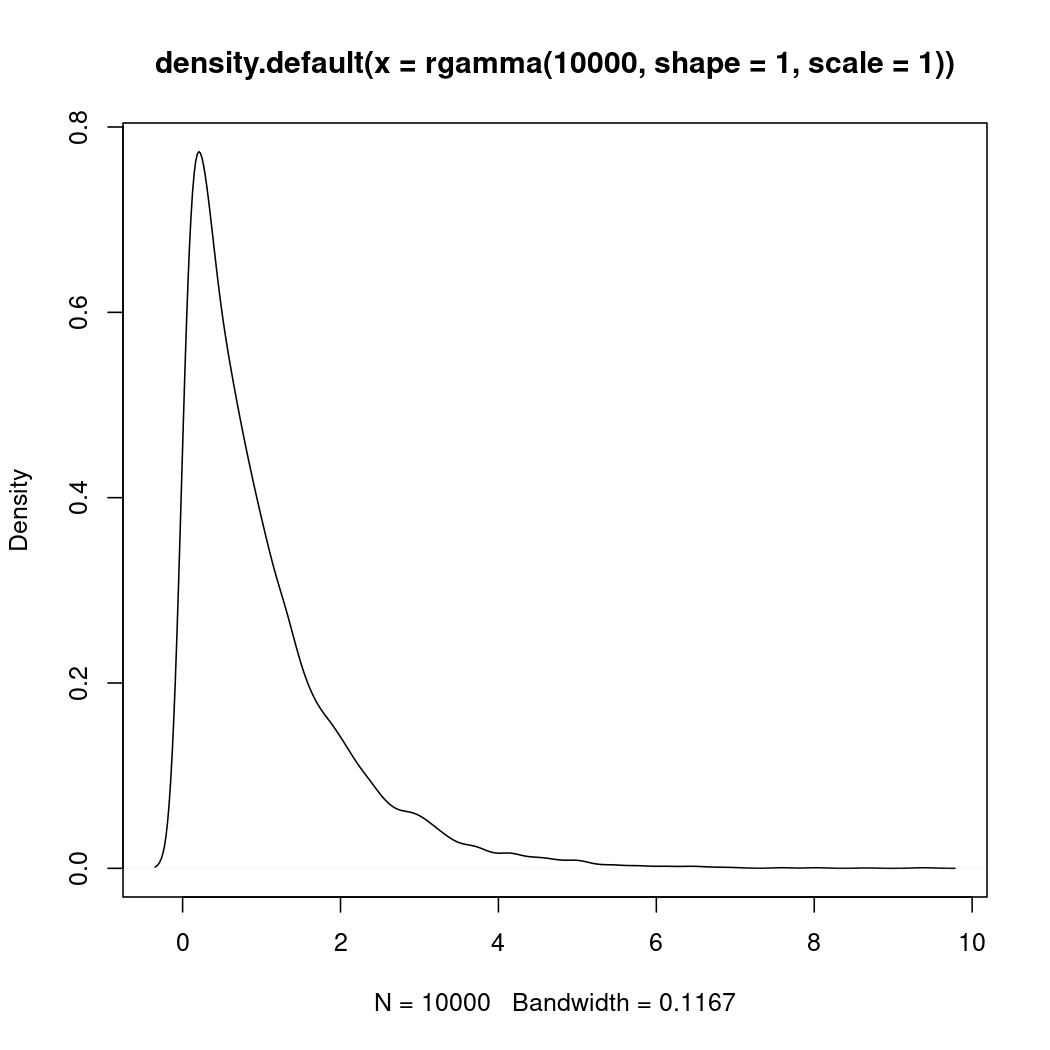

In [50]:
plot(density(rgamma(10000,shape=1,scale=1)))

In [51]:
sh = .5
rgamma(10000,shape=sh,scale=1/sqrt(sh)) %>% var

[1] 0.9974361

In [52]:
sim_data <- map_dfr(
    seq(0.5,4.5,.5), function(x){tibble(data=rgamma(100000, shape=x, scale=1/sqrt(x+.0001)),shape=x,scale=1/sqrt(x))})

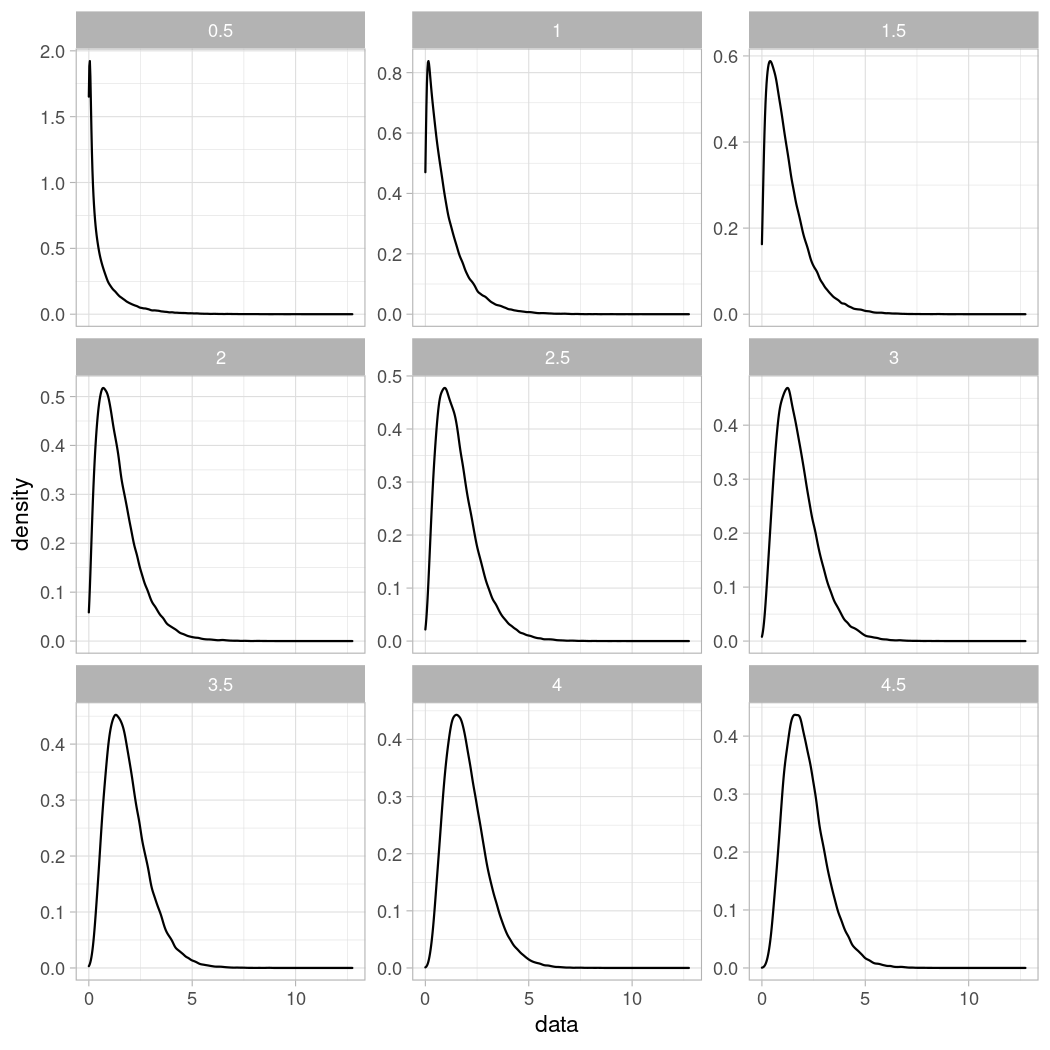

In [53]:
ggplot(sim_data, aes(x=data)) + geom_density() + facet_wrap(~shape,scales = "free_y")

In [54]:
source("sim_Y_gamma.r")

In [55]:
get_gamma_df <- function(shape){
    result <- sim_Y_gamma(h2=.3,shape=shape)
    return(map_dfr(result$Y,tibble,.id="i") %>% mutate(shape=shape))
}

In [56]:
gamma_results <- map_dfr(seq(0.5,4.5,.5),get_gamma_df)

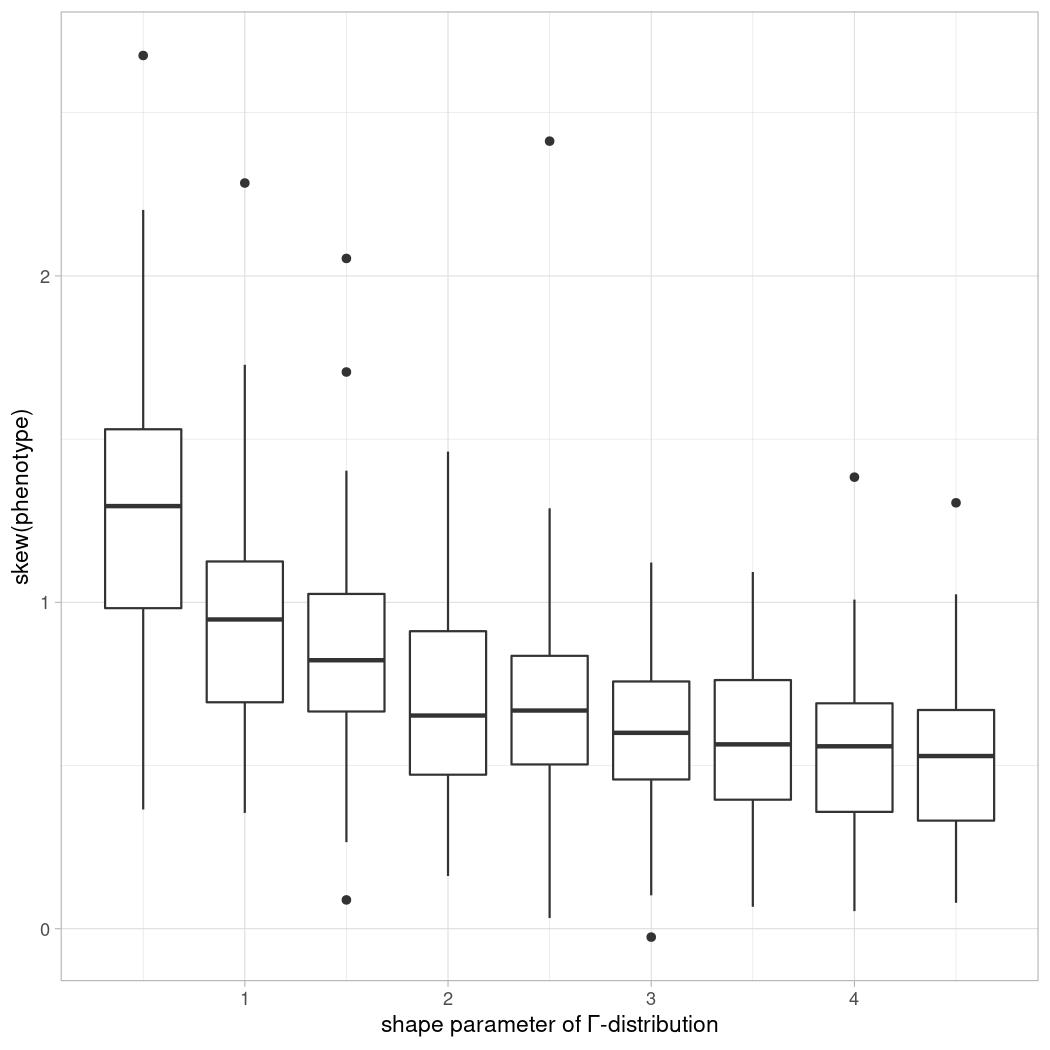

In [57]:
gamma_results %>%
    group_by(shape,i) %>%
    summarize(skew=skewness(value),.groups = "drop") %>%
    ggplot(aes(x=shape, y=skew, group=shape)) + geom_boxplot() + xlab("shape parameter of Γ-distribution") + ylab("skew(phenotype)")

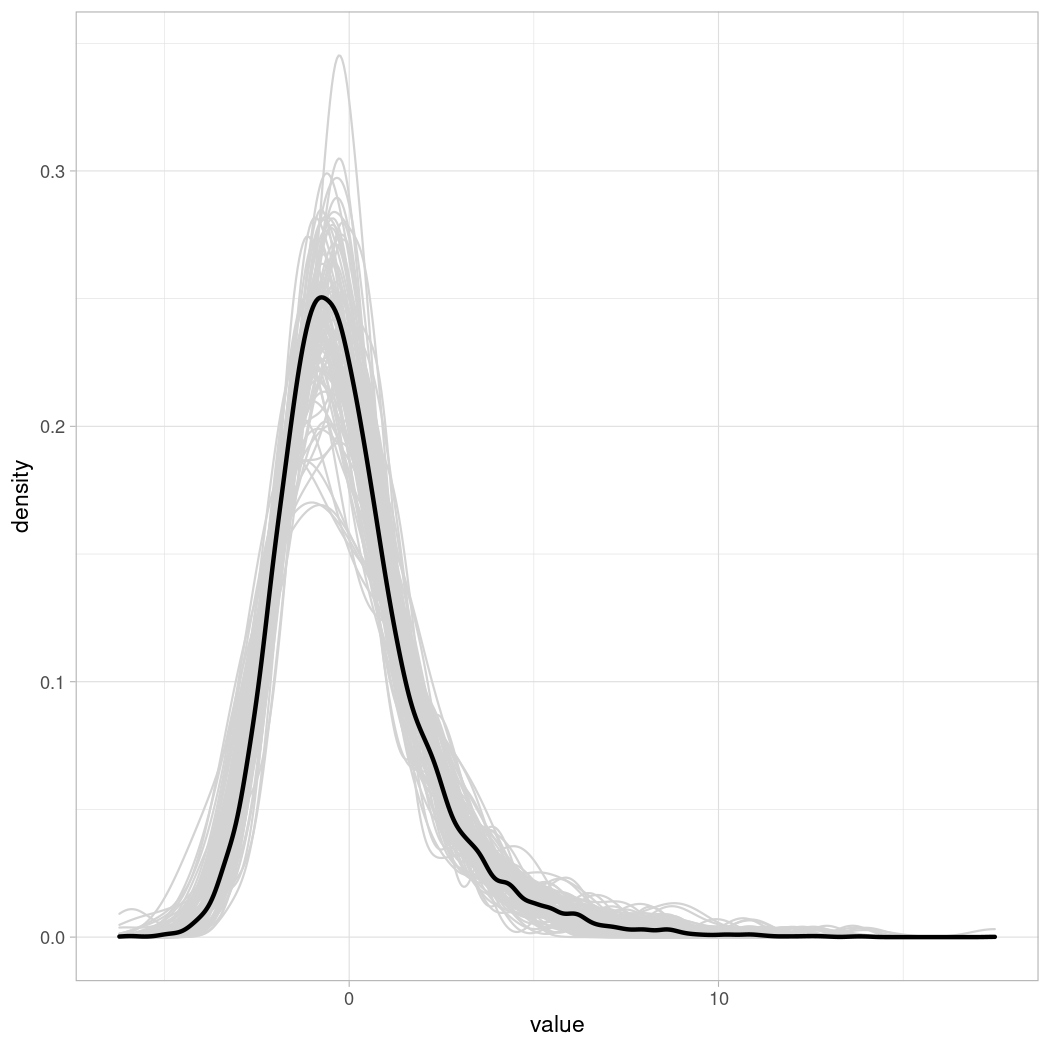

In [59]:
gamma_results %>% filter(shape==.5) %>% group_by(i) %>% mutate(value=value-mean(value)) %>% ggplot(aes(value)) + geom_density(aes(group=i),color="lightgrey") + geom_density(lwd=1) + theme(legend.position = "none")

### Export csv files

In [74]:
for(shape in seq(0.5,4.5,.5)){
    outdir = str_c("herit.3/gamma/shape_",shape)
    dir.create(outdir)
    result <- sim_Y_gamma(h2=.3,shape=shape)
    tibble(caus=result$Caus) %>% unnest(caus) %>% mutate(i=row_number()) %>% select(i,caus) %>% write_tsv(str_c(outdir,"/caus.tsv"))
    for(i in 1:100){
        write_csv(result$Y[[i]] %>% rename(accession_id=ecot_id,phenotype_value=value),str_c(outdir,"/shape_",shape,"_",i,".csv"))
    }
}